In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.set_option('display.max_rows', None)

#### 1. Downloading and Data Exploration

In [2]:
df = pd.read_csv('movies_data.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# View the percentage of unknown values
print(f'The size of our dataset - {df.shape}')
print(f'Percentage of unknown values:')
for col in df.columns:
    col_null = df[col].isnull()
    print(f'{col} - {col_null.sum()} - {np.mean(col_null) * 100:.0f}%')

The size of our dataset - (7668, 15)
Percentage of unknown values:
name - 0 - 0%
rating - 77 - 1%
genre - 0 - 0%
year - 0 - 0%
released - 2 - 0%
score - 3 - 0%
votes - 3 - 0%
director - 0 - 0%
writer - 3 - 0%
star - 1 - 0%
country - 3 - 0%
budget - 2171 - 28%
gross - 189 - 2%
company - 17 - 0%
runtime - 4 - 0%


In [4]:
# Remove all items with unknown values and check
df = df.dropna()
print(f'The new size of our dataset - {df.shape}')
print(f'The number of unknown values - {df.isnull().sum().sum()}')

The new size of our dataset - (5421, 15)
The number of unknown values - 0


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Change the data types of some columns
columns_to_convert = {'gross': 'int64', 'budget': 'int64', 'votes': 'int64', 'runtime': int, 'year': int}
df = df.astype(columns_to_convert)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [7]:
# Transform the data to extract only the year from the released date column
df['year_released'] = df['released'].str.extract(r'(\d{4})').astype('int')
df = df.drop('released', axis=1)
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [8]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
7480,The Lion King,PG,Animation,2019,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,2019
6653,Jurassic World,PG-13,Action,2015,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,2015
6043,The Avengers,PG-13,Action,2012,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,2012
6646,Furious 7,PG-13,Action,2015,7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137,2015
7494,Frozen II,PG,Animation,2019,6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103,2019


In [9]:
# View counts for company
df.company.value_counts(ascending=False).head(10)

company
Universal Pictures           330
Columbia Pictures            302
Warner Bros.                 298
Paramount Pictures           279
Twentieth Century Fox        209
New Line Cinema              155
Walt Disney Pictures         107
Touchstone Pictures          105
Metro-Goldwyn-Mayer (MGM)     99
TriStar Pictures              75
Name: count, dtype: int64

In [10]:
df.drop_duplicates().shape

(5421, 15)

As we have the same size of the dataset as before we know that we haven't dubplicates in our dataframe.

#### 2. Data Visualization

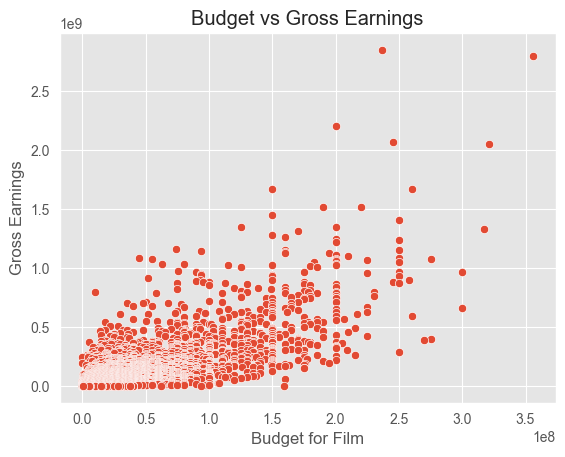

In [11]:
sns.scatterplot(x=df.budget, y=df.gross);
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film');
plt.ylabel('Gross Earnings');

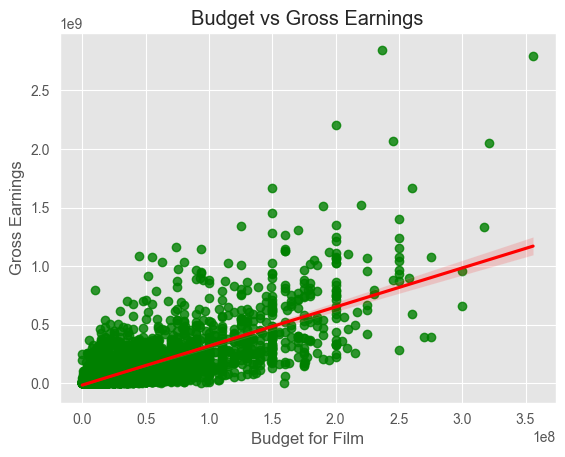

In [12]:
sns.regplot(x=df.budget, y=df.gross, scatter_kws={'color': 'green'}, line_kws={'color': 'red'});
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film');
plt.ylabel('Gross Earnings');

In [13]:
# View the correlation matrix
corr_matrix = df.corr(numeric_only=True, method='pearson')
corr_matrix

,year,score,votes,budget,gross,runtime,year_released
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_released,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


We really see the high correlation between budget and gross - 0.74 !!!

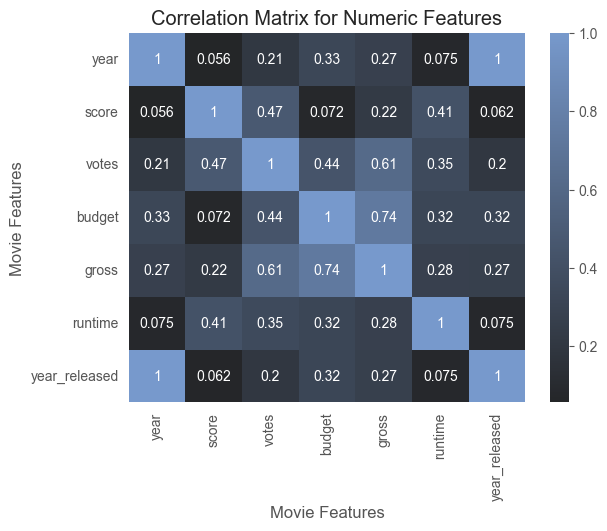

In [14]:
custom_palette = sns.dark_palette('#79C', as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=custom_palette);
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features');
plt.ylabel('Movie Features');

To view the correlation of all features, we need to convert categorical features to numeric features.

In [15]:
df.dtypes

name              object
rating            object
genre             object
year               int32
score            float64
votes              int64
director          object
writer            object
star              object
country           object
budget             int64
gross              int64
company           object
runtime            int32
year_released      int32
dtype: object

In [16]:
df_numerized = df.iloc[:, :]
for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object' and col != 'name':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
df_numerized.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,5,0,2009,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,Avengers: Endgame,5,0,2019,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,Titanic,5,6,1997,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,Avengers: Infinity War,5,0,2018,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


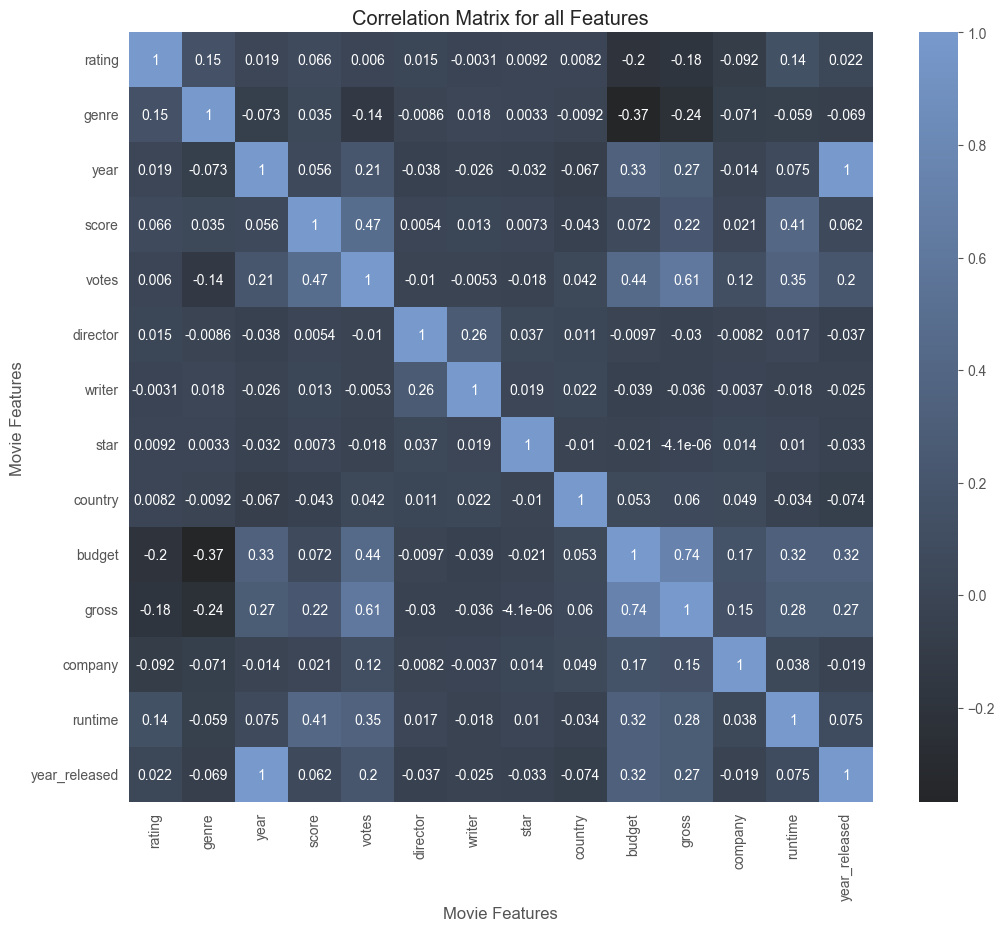

In [17]:
corr_matrix_total = df_numerized.corr(numeric_only=True, method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_total, annot=True, cmap=custom_palette);
plt.title('Correlation Matrix for all Features')
plt.xlabel('Movie Features');
plt.ylabel('Movie Features');

In [18]:
corr_pairs = corr_matrix_total.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs[(sorted_pairs) > 0.5]

votes          gross            0.614751
gross          votes            0.614751
budget         gross            0.740247
gross          budget           0.740247
year           year_released    0.998726
year_released  year             0.998726
rating         rating           1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
year           year             1.000000
genre          genre            1.000000
runtime        runtime          1.000000
year_released  year_released    1.000000
dtype: float64

Votes and budget have the highest correlation to gross earnings.

#### 3. Feature Engineering

To find out the most profitable movies, we can define a new feature `gross_budget_rate` - and we can determine which genres made the most profit relative to the resources spent.

In [19]:
df['gross_budget_rate'] = df.gross / df.budget
df.sort_values(by='gross_budget_rate', ascending=False).head(15)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,gross_budget_rate
5114,Paranormal Activity,R,Horror,2007,6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86,2009,12890.386667
3459,The Blair Witch Project,R,Horror,1999,6.5,239000,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81,1999,4143.984983
6815,The Gallows,R,Horror,2015,4.3,20000,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000,42964410,New Line Cinema,81,2015,429.644100
2093,El Mariachi,R,Action,1992,6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81,1993,291.560000
5154,Once,R,Drama,2007,7.8,112000,John Carney,John Carney,Glen Hansard,Ireland,150000,20936722,Bórd Scannán na hÉireann,86,2007,139.578147
2467,Clerks,R,Comedy,1994,7.7,214000,Kevin Smith,Kevin Smith,Brian O'Halloran,United States,27000,3151130,View Askew Productions,92,1994,116.708519
4471,Napoleon Dynamite,PG,Comedy,2004,6.9,204000,Jared Hess,Jared Hess,Jon Heder,United States,400000,46138887,Fox Searchlight Pictures,96,2004,115.347217
3233,In the Company of Men,R,Comedy,1997,7.2,13000,Neil LaBute,Neil LaBute,Aaron Eckhart,Canada,25000,2804473,Alliance Atlantis Communications,97,1997,112.178920
4814,Keeping Mum,R,Comedy,2005,6.8,34000,Niall Johnson,Richard Russo,Rowan Atkinson,United Kingdom,169000,18586834,Summit Entertainment,99,2006,109.981266
4304,Open Water,R,Adventure,2003,5.7,52000,Chris Kentis,Chris Kentis,Blanchard Ryan,United States,500000,54683487,Plunge Pictures LLC,79,2004,109.366974


Analysis of Budget/Gross dependence on genre

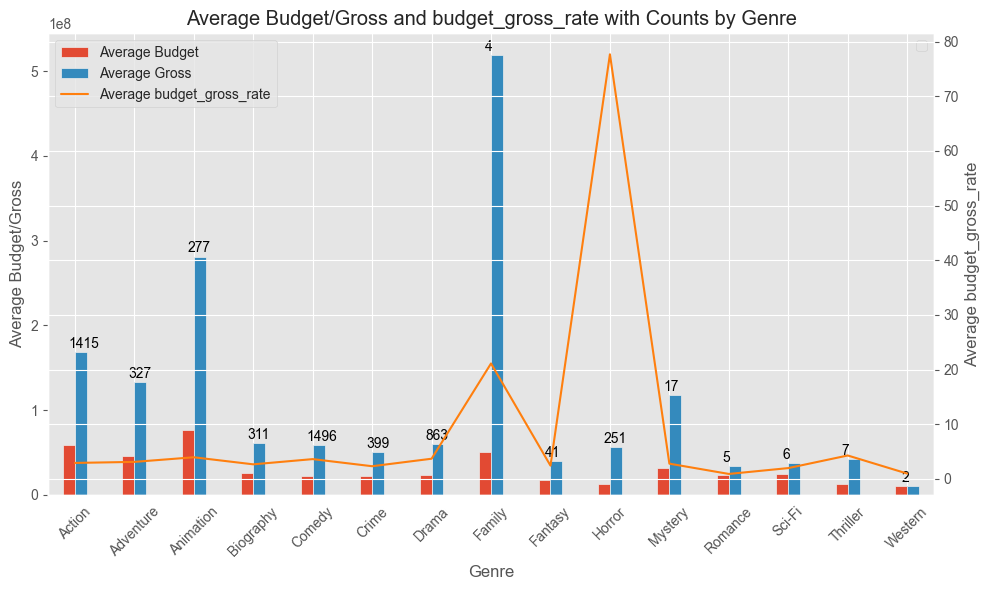

In [20]:
# Group by 'genre' and calculate count, average budget, gross and gross_budget_rate
genre_stats = df.groupby('genre').agg({'budget': 'mean', 'gross': 'mean', 'genre': 'count', 'gross_budget_rate': 'mean'})
genre_stats.rename(columns={'genre': 'count'}, inplace=True)
genre_stats

# Plot the bar charts
fig, ax1 = plt.subplots(figsize=(10, 6))
genre_stats[['budget', 'gross']].plot(kind='bar', ax=ax1, width=0.4)

# Add count labels on top of each bar
for i, (index, row) in enumerate(genre_stats.iterrows()):
    ax1.text(i - 0.1, row['gross'] + 5000000, str(row['count'].astype(int)), color='black')

# Plot the line chart on the same picture
ax2 = ax1.twinx()
genre_stats['gross_budget_rate'].plot(kind='line', ax=ax2, color='tab:orange', label='Average budget_gross_rate')

# Set labels and title
ax1.set_ylabel('Average Budget/Gross')
ax1.set_xlabel('Genre')
ax1.set_title('Average Budget/Gross and budget_gross_rate with Counts by Genre')
ax2.set_ylabel('Average budget_gross_rate')

# Combine legends from both axes
lines1, _ = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend([])
ax1.grid(axis='y')
ax1.tick_params(axis='x', rotation=45)
ax2.legend(lines1 + lines2, ['Average Budget', 'Average Gross'] + labels2, loc='upper left')
plt.tight_layout();

In [21]:
# Save data for Power BI
df.to_csv('movies_bi.csv')